<a href="https://colab.research.google.com/github/samjgorman/cs230/blob/master/Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Implementation of Titles Zoom Deep Learning project for CS230

## Kaili Wang, Seyi Olujide, Sam Gorman

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

# Install detectron2

In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 12.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=e580a4a55efc520a85932af474dfd59ce4513a4ff5c13f905bdad973f941597f
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-04hkb6dy
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-04hkb6dy
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-li

In [2]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 552kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200610-cp36-none-any.whl size=41025 sha256=8fdbd3849850f3be56aa9b6660fdefe967ada25d6f8608f863673723e1ed85cb
  Stored in directory: /root/.cache/pip/wheels/16/60/70/e15b83432e16af3359c9e73ae8886342b2e899b60c14fa7c0d
Successfully built fvcore


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Run a pre-trained detectron2 model

## mount drive


In [4]:
# images = '/content/drive/My Drive/CS230 data/labeleddata/images'
images = '/content/drive/My Drive/CS230 data/preprocessed'

annotations = '/content/drive/My Drive/CS230 data/labeleddata/annotations'
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


read random image


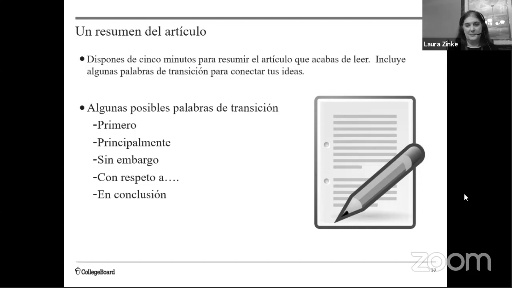

In [5]:
im = cv2.imread("/content/drive/My Drive/CS230 data/labeleddata/images/world_video0_frame2080.jpg")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [6]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:19, 9.00MB/s]                           


In [7]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[454.7195,  10.1385, 494.8748,  50.5860]], device='cuda:0'))

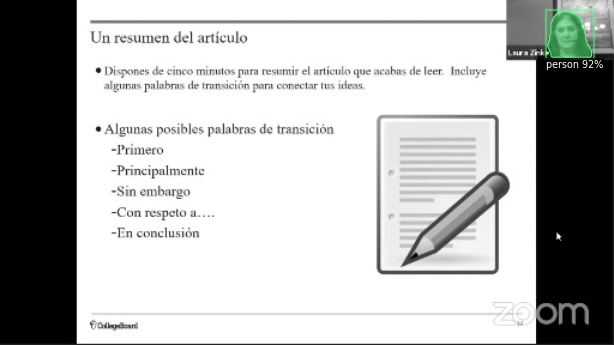

In [8]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# Train on our custom dataset

In [0]:
# constant: dataset_num
# change this when you want to register another dataset 

dataset_num = "6"

In [0]:
# CONSTANTS

dataset_num = "5"
dataset_name = "titles" + dataset_num + "_train"

PATH_TO_IMAGES = "/content/drive/My Drive/CS230 data/labeleddata/images/"

In this section, we train an existing detectron2 model on ur dataset in a new format.


We'll train a segmentation model from an existing model pre-trained on COCO dataset, available in detectron2's model zoo.

Note that COCO dataset does not have the "title" category. We'll be able to recognize this new class in a few minutes.

## Prepare the dataset

Register the dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).
Here, the dataset is in its custom format, therefore we write a function to parse it and prepare it into detectron2's standard format. See the tutorial for more details.


In [0]:


import os
import numpy as np
import json
from detectron2.structures import BoxMode

def get_title_dicts(img_dir):
  json_file = img_dir + "../dataset_labels.json"
  with open(json_file) as f:
    imgs_anns = json.load(f)
    dataset_dicts = []

    for idx, img_data in enumerate(imgs_anns):
      record = {}
      filename = img_dir + img_data["External ID"]
      if img_data["Label"] == {}:
        continue
      record["file_name"] = filename
      record["image_id"] = idx
      record["height"] = 288 #height
      record["width"] = 512 #width
    
      objs = []
      for title in img_data["Label"]["objects"]:
        bbox = list(title["bbox"].values())[0:4]
        y, x, h, w = bbox
        obj = {
            "bbox": [x, y, w, h],
            "bbox_mode": BoxMode.XYWH_ABS,
            "segmentation": [[x, y, x+w, y, x+w, y+h, x, y+h]],
            "category_id": 0,
            "iscrowd": 0
        }
        objs.append(obj)
      
      record["annotations"] = objs
      dataset_dicts.append(record)
          
    return dataset_dicts





from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train"]: 
    DatasetCatalog.register("titles" + dataset_num + "_" + d, lambda d=d: get_title_dicts("/content/drive/My Drive/CS230 data/labeleddata/images/"))
    MetadataCatalog.get("titles" + dataset_num + "_" + d).set(thing_classes=["title"])
titles_metadata = MetadataCatalog.get(dataset_name)

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



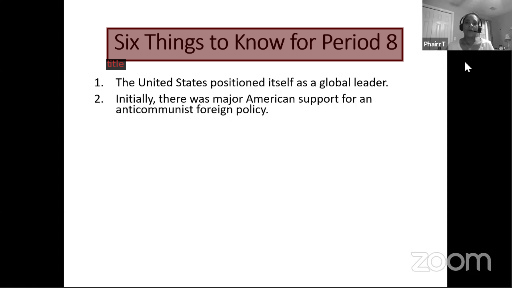

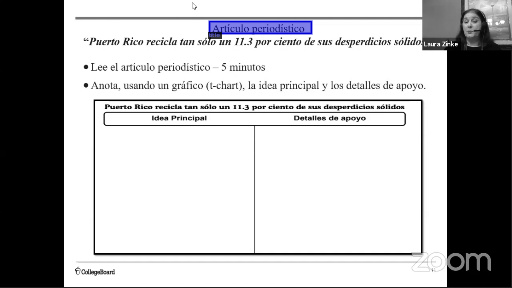

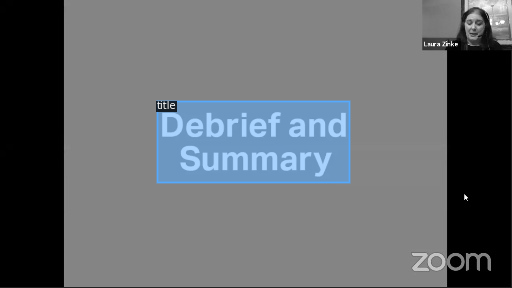

In [12]:
dataset_dicts = get_title_dicts("/content/drive/My Drive/CS230 data/labeleddata/images/")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])

    visualizer = Visualizer(img[:, :, ::-1], metadata=titles_metadata, scale=1)

    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

## Train!

Now, let's fine-tune a coco-pretrained ResNext Mask R-CNN model on the titles dataset. 



In [13]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = (dataset_name,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0005 # 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (titles)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/10 00:15:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:44, 9.79MB/s]                           
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (1,) in the model!


[06/10 00:16:23 d2.engine.train_loop]: Starting training from iteration 0
[06/10 00:16:53 d2.utils.events]:  eta: 0:07:04  iter: 19  total_loss: 2.294  loss_cls: 0.763  loss_box_reg: 0.010  loss_mask: 0.675  loss_rpn_cls: 0.633  loss_rpn_loc: 0.070  time: 1.5019  data_time: 0.0619  lr: 0.000010  max_mem: 6258M
[06/10 00:17:25 d2.utils.events]:  eta: 0:06:41  iter: 39  total_loss: 1.769  loss_cls: 0.544  loss_box_reg: 0.064  loss_mask: 0.620  loss_rpn_cls: 0.430  loss_rpn_loc: 0.103  time: 1.5325  data_time: 0.0048  lr: 0.000020  max_mem: 6258M
[06/10 00:17:57 d2.utils.events]:  eta: 0:06:18  iter: 59  total_loss: 1.215  loss_cls: 0.363  loss_box_reg: 0.188  loss_mask: 0.559  loss_rpn_cls: 0.016  loss_rpn_loc: 0.063  time: 1.5597  data_time: 0.0050  lr: 0.000030  max_mem: 6258M
[06/10 00:18:29 d2.utils.events]:  eta: 0:05:51  iter: 79  total_loss: 1.096  loss_cls: 0.271  loss_box_reg: 0.240  loss_mask: 0.482  loss_rpn_cls: 0.017  loss_rpn_loc: 0.068  time: 1.5706  data_time: 0.0050  lr:

In [15]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 142), started 0:12:13 ago. (Use '!kill 142' to kill it.)

<IPython.core.display.Javascript object>

## Inference & evaluation using the trained model

NOTE TO SELF:
it will only go through whatever is in the dataset_dicts that gets returned from the get_dicts function. So it actually doesn't really matter if all the images are in the same directory or not. 


Now, let's run inference with the trained model on the titles validation dataset. First, let's create a predictor using the model we just trained:



In [0]:
# PREPARE THE VALIDATION SET

import re

"""
def get_val_set_dicts(path):
  json_file = path + "val_set.json"
  with open(json_file) as f:
    imgs_anns = json.load(f)
    dataset_dicts = []

    for idx, img_data in enumerate(imgs_anns):
      record = {}
      url = img_data["Labeled Data"]
      filename = re.search(r"\b/(\w)+\.jpg", url).group()
      record["file_name"] = path + "all_images" + filename
      record["image_id"] = idx
      record["height"] = 288 #height
      record["width"] = 512 #width
      objs = []
      if img_data["Label"] != {}:
        for title in img_data["Label"]["objects"]:
          bbox = list(title["bbox"].values())[0:4]
          y, x, h, w = bbox
          obj = {
              "bbox": [x, y, w, h],
              "bbox_mode": BoxMode.XYWH_ABS,
              "segmentation": [[x, y, x+w, y, x+w, y+h, x, y+h]],
              "category_id": 0,
              "iscrowd": 0
          }
          objs.append(obj)
      
      record["annotations"] = objs
      dataset_dicts.append(record)
          
    return dataset_dicts
"""
def get_val_set_dicts(img_dir):
  json_file = img_dir + "../dataset_labels.json"
  with open(json_file) as f:
    imgs_anns = json.load(f)
    dataset_dicts = []

    for idx, img_data in enumerate(imgs_anns):
      record = {}
      
      filename = img_dir + img_data["External ID"]
      record["file_name"] = filename
      record["image_id"] = idx
      record["height"] = 288 #height
      record["width"] = 512 #width
    
      objs = []
      if img_data["Label"] != {}:
        # there is a label
        for title in img_data["Label"]["objects"]:
          bbox = list(title["bbox"].values())[0:4]
          y, x, h, w = bbox
          obj = {
              "bbox": [x, y, w, h],
              "bbox_mode": BoxMode.XYWH_ABS,
              "segmentation": [[x, y, x+w, y, x+w, y+h, x, y+h]],
              "category_id": 0,
              "iscrowd": 0
          }
          objs.append(obj)
      
      record["annotations"] = objs
      dataset_dicts.append(record)
          
    return dataset_dicts

# path = "/content/drive/My Drive/CS230 data/"
path = "/content/drive/My Drive/CS230 data/labeleddata/images/"


test_dataset_num = "12"
val_set_name = "titles" + test_dataset_num + "_val"


In [15]:
# register
DatasetCatalog.register(val_set_name, lambda: get_val_set_dicts(path))
MetadataCatalog.get(val_set_name).set(thing_classes=["title"])

Metadata(name='titles12_val', thing_classes=['title'])

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set the testing threshold for this model
cfg.DATASETS.TEST = (val_set_name, ) # change to testing dataset
predictor = DefaultPredictor(cfg)

Then, we randomly select several samples to visualize the prediction results.

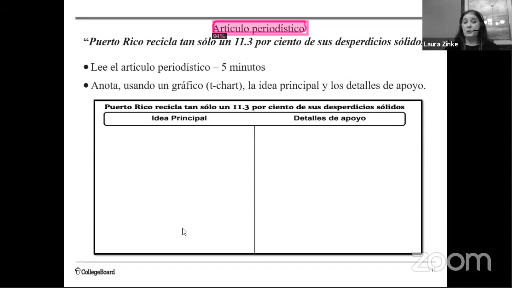

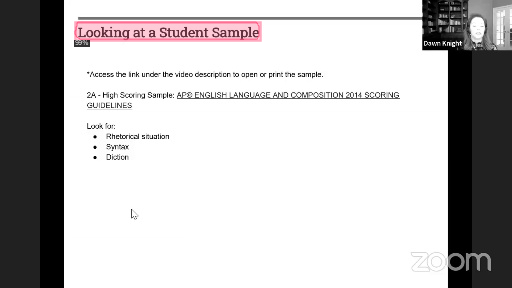

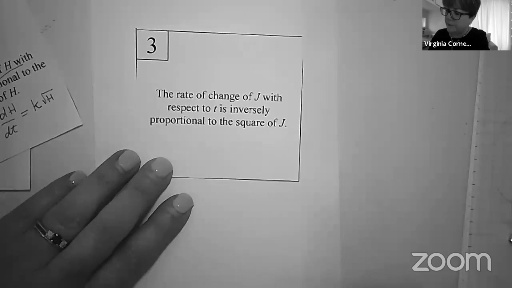

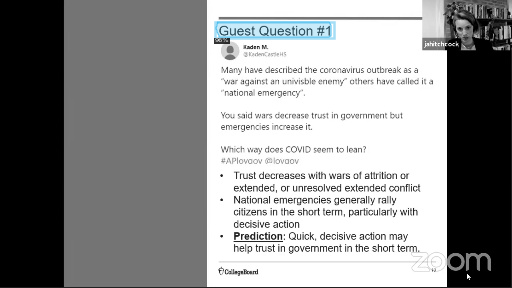

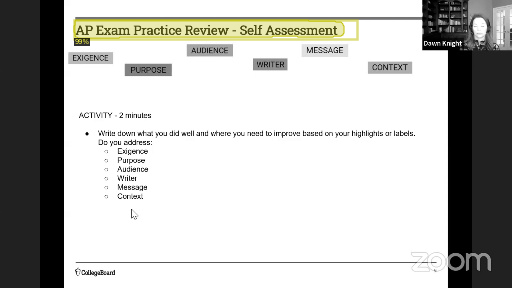

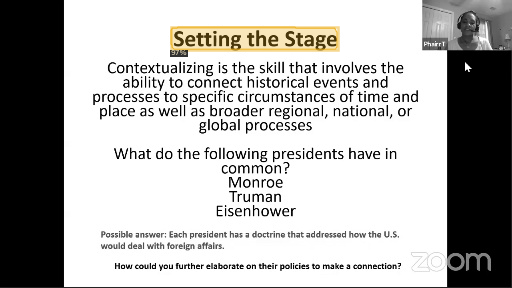

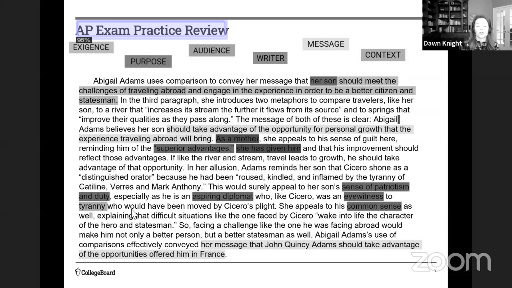

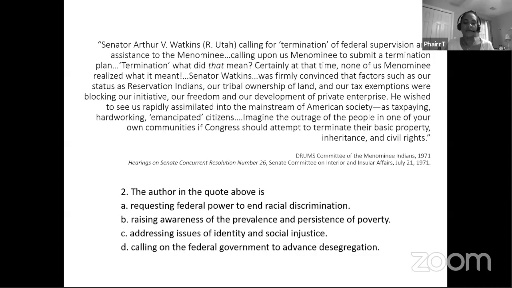

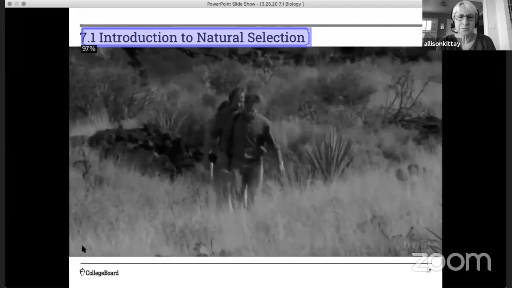

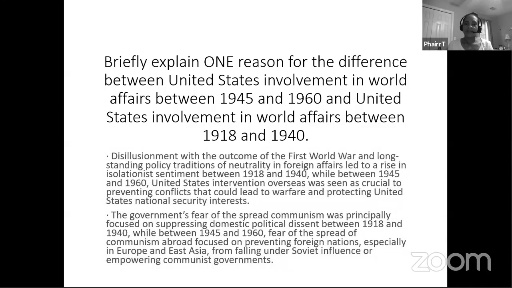

In [17]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_val_set_dicts(path) # change to test path

for d in random.sample(dataset_dicts, 10):  

    try:

      im = cv2.imread(d["file_name"])
      outputs = predictor(im)
      v = Visualizer(im[:, :, ::-1],
                    metadata=titles_metadata, 
                    scale=1, 
                    instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
      )
      # for mask rcnn
      v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

      cv2_imshow(v.get_image()[:, :, ::-1])
    except:
      continue

In [18]:

from detectron2.evaluation import RotatedCOCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = RotatedCOCOEvaluator(val_set_name, cfg, False, output_dir=path + "/detectron_output" + test_dataset_num + "/")

val_loader = build_detection_test_loader(cfg, val_set_name)
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [06/10 00:25:12 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'titles12_val'. Trying to convert it to COCO format ...
[06/10 00:25:12 d2.data.datasets.coco]: Converting annotations of dataset 'titles12_val' to COCO format ...)
[06/10 00:25:12 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/10 00:25:12 d2.data.datasets.coco]: Conversion finished, #images: 1776, #annotations: 1241
[06/10 00:25:12 d2.data.datasets.coco]: Caching COCO format annotations at '/content/drive/My Drive/CS230 data/labeleddata/images//detectron_output12/titles12_val_coco_format.json' ...
[06/10 00:25:12 d2.data.common]: Serializing 1776 elements to byte tensors and concatenating them all ...
[06/10 00:25:12 d2.data.common]: Serialized dataset takes 0.46 MiB
[06/10 00:25:12 d2.evaluation.evaluator]: Start inference on 1776 images
[06/10 00:25:17 d2.evaluation.evaluator]: Inference done 11/1776. 0.2881 s / img. ETA=0:10:11
[06/10 00:25:23 d2.evaluation.

AssertionError: ignored